# Preprocess images
Normalize and threshold images

In [1]:
import os
import glob
import tqdm
import numpy as np
import skimage
import cv2

## !! Inputs !!
Change these for each run

In [2]:
input_dir = "test_images"
output_dir = "preprocessed_images"

## Function for image preprocessing

In [3]:
def preprocess(img_path: str) -> np.array:
    """
    Reads in, normalizes, and thresholds a single image.
    Returns np.array of preprocessed image.
    """

    # Read in
    img = skimage.io.imread(img_path)

    # Normalize
    norm = np.zeros_like(img)
    cv2.normalize(img, norm, 0, 255, cv2.NORM_MINMAX)

    # Threshold
    _, thresh = cv2.threshold(img, 0, 255, cv2.THRESH_OTSU)

    return thresh

## Preprocess all the images in the input directory and write out to the output directory

In [4]:
all_image_paths = glob.glob(os.path.join(input_dir, "*.tif"))
[os.path.basename(path) for path in all_image_paths]

['F01_706w1.tif',
 'F01_837w1.tif',
 'F01_621w1.tif',
 'F01_291w1.tif',
 'F01_508w1.tif',
 'F01_366w1.tif',
 'F01_732w1.tif',
 'F01_589w1.tif',
 'F01_120w1.tif',
 'F01_202w1.tif',
 'F01_204w1.tif']

In [5]:
# Make sure output directory exists
if not os.path.exists(output_dir):
    os.mkdir(output_dir)

In [6]:
for path in tqdm.tqdm(all_image_paths):
    
    # Apply preprocessing 
    processed_img = preprocess(path)

    # Save
    basename = os.path.basename(path)
    extension_idx = basename.rfind(".")
    fname = os.path.join(output_dir, f"{basename[:extension_idx]}_preprocessed.tif")
    skimage.io.imsave(fname, processed_img, check_contrast=False)

  0%|          | 0/11 [00:00<?, ?it/s]

100%|██████████| 11/11 [00:00<00:00, 63.06it/s]


/opt/anaconda3/envs/imaging/lib/python3.12/site-packages/skimage/io/_plugins/matplotlib_plugin.py:158: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


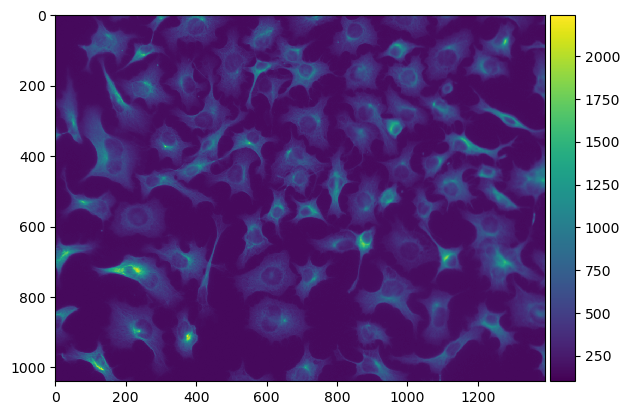

In [7]:
all_image_paths.sort()
skimage.io.imshow(all_image_paths[0])

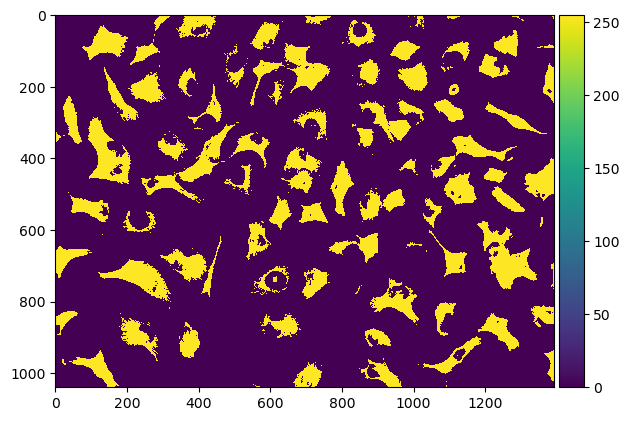

In [8]:
all_preprocessed_images = glob.glob(os.path.join(output_dir, "*.tif"))
all_preprocessed_images.sort()
skimage.io.imshow(all_preprocessed_images[0])